# Mlops workout

### Dataset Description


The dataset includes indicators which are the most relevant variables directly or indirectly influencing heart disease.

- HeartDisease - Whether the person has heart disease or not.
- BMI - Obesity indicator.
- Smoking - Whether the person has smoking habit or not.
- AlcoholDrinking - Whether the person has drinking habit or not.
- Stroke - Whether the person has stroke history.
- PhysicalHealth - Level of physical health.
- MentalHealth - Level of mental health.
- DiffWalking - Whether the person has difficulty on walking or not.
- Sex - Gender.
- AgeCategory - Age group.
- Race - Race.
- Diabetic - Whether the person is diabetic or not.
- PhysicalActivity - Whether the person has habit to do physical activity or not.
- GenHealth - Level of general health.
- SleepTime - Amount of sleeping time in hour.
- Asthma - Whether the person has asthma or not.
- KidneyDisease - Whether the person has kidney disease or not.
- SkinCancer - Whether the person has skin cancer or not.

### Packages

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

#### Load Dataset

In [18]:
DATASET = Path("../Dataset/heartdisease_indicator_train.csv")
VALIDATION_DATASET = Path("../Dataset/heartdisease_indicator_test.csv")

In [19]:
TRAIN_TEST = pd.read_csv(DATASET)
VALID = pd.read_csv(VALIDATION_DATASET)

### EDA

In [20]:
TRAIN_TEST.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,22.78,No,No,No,5.0,0.0,No,Male,60-64,No,Yes,Very good,7.0,No,No,Yes
1,Yes,24.96,Yes,No,No,0.0,25.0,No,Female,70-74,No,Yes,Very good,7.0,Yes,No,No
2,No,26.63,No,No,No,0.0,0.0,No,Female,50-54,No,Yes,Excellent,6.0,No,No,No
3,Yes,26.50,Yes,No,No,10.0,0.0,No,Male,80 or older,Yes,Yes,Good,7.0,No,No,Yes
4,Yes,26.22,Yes,No,No,2.0,0.0,No,Female,80 or older,Yes,Yes,Good,8.0,No,No,No


In [21]:
TRAIN_TEST.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
10725,No,21.12,No,No,No,0.0,15.0,No,Male,18-24,No,Yes,Very good,7.0,Yes,No,No
27203,No,29.12,No,No,Yes,30.0,30.0,Yes,Female,80 or older,Yes,Yes,Poor,5.0,No,No,Yes
9590,No,28.59,Yes,No,No,0.0,0.0,No,Male,55-59,No,Yes,Good,7.0,No,No,No
7962,No,24.39,Yes,No,No,0.0,0.0,No,Male,75-79,No,Yes,Very good,7.0,No,Yes,No
37865,Yes,36.73,No,No,Yes,30.0,30.0,Yes,Female,40-44,No,No,Fair,6.0,Yes,Yes,Yes


In [22]:
TRAIN_TEST.tail(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
41054,Yes,42.25,No,No,No,0.0,0.0,No,Female,50-54,No,Yes,Very good,7.0,Yes,No,No
41055,No,29.79,No,No,No,6.0,0.0,Yes,Female,75-79,No,No,Good,8.0,No,No,No
41056,No,28.37,No,No,No,30.0,0.0,Yes,Male,50-54,Yes,Yes,Poor,8.0,No,Yes,No
41057,Yes,24.14,No,No,Yes,0.0,0.0,No,Male,80 or older,No,Yes,Very good,9.0,No,Yes,Yes
41058,No,29.05,Yes,No,No,0.0,0.0,No,Female,50-54,No,Yes,Very good,7.0,No,No,No


In [23]:
TRAIN_TEST.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,41059.000000,41059.000000,41059.000000,41059.000000
mean,28.824267,5.444434,4.222826,7.105653
std,6.466499,9.987576,8.496962,1.583330
min,12.210000,0.000000,0.000000,1.000000
25%,24.390000,0.000000,0.000000,6.000000
50%,27.800000,0.000000,0.000000,7.000000
75%,32.080000,5.000000,3.000000,8.000000
max,92.530000,30.000000,30.000000,24.000000


In [24]:
TRAIN_TEST.describe(include="object")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,41059,41059,41059,41059,41059,41059,41059,41059,41059,41059,41059,41059,41059
unique,2,2,2,2,2,2,13,4,2,5,2,2,2
top,No,No,No,No,No,Male,70-74,No,Yes,Good,No,No,No
freq,20537,20913,38711,37210,30969,21660,5500,30824,29207,13167,34640,37871,35623


In [25]:
TRAIN_TEST.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

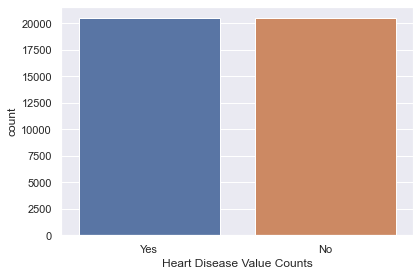

In [26]:
sns.countplot(x = 'HeartDisease', data = TRAIN_TEST).\
                    set_xlabel("Heart Disease Value Counts")

plt.tight_layout()

In [27]:
def plot_cat(col: str, bin = 20):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    true_flag = TRAIN_TEST['HeartDisease'] == "Yes"
    ax.hist(TRAIN_TEST[~true_flag][col], bins=bin, alpha=0.8, color='blue', label="No HeartDisease")
    ax.hist(TRAIN_TEST[true_flag][col], bins=bin, alpha=.8, color="red", label="HeartDisease")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

    plt.tight_layout()
    

In [28]:
obj_columns = [col for col in TRAIN_TEST.describe(include = 'object') if col != "HeartDisease"]

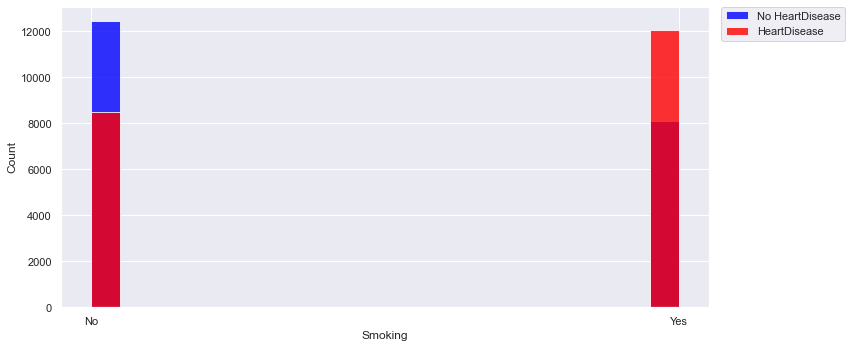

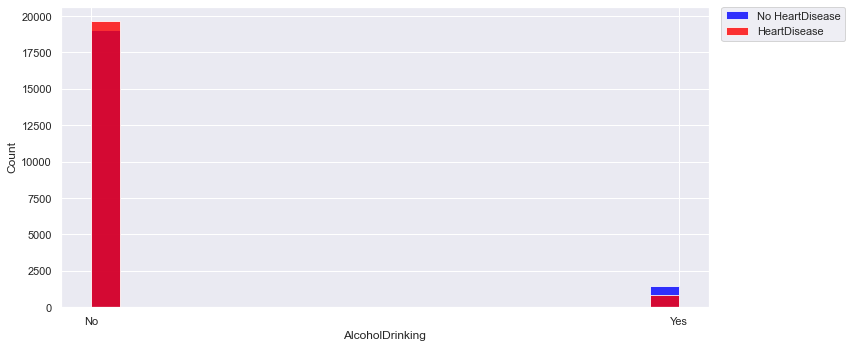

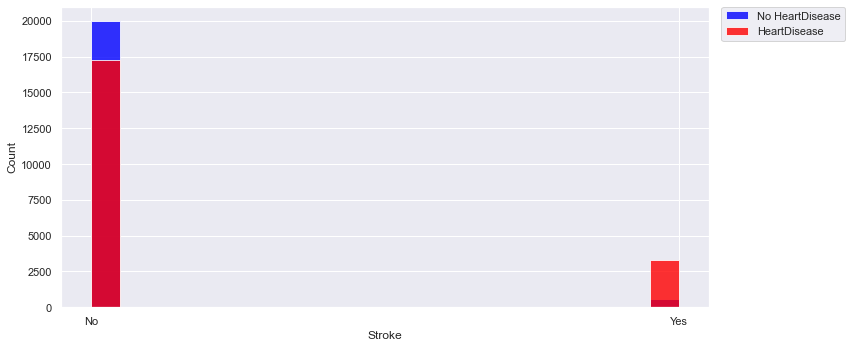

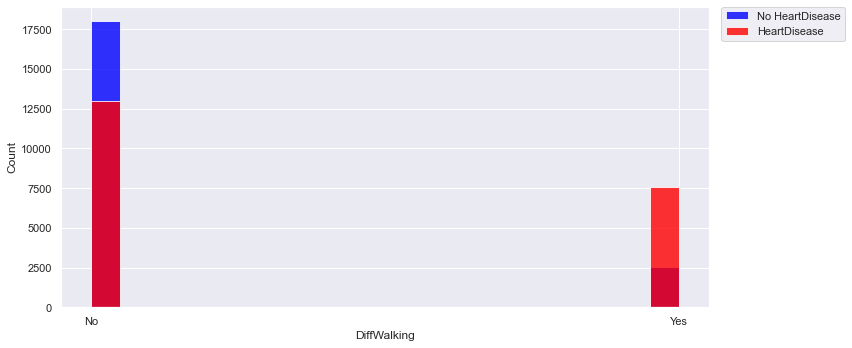

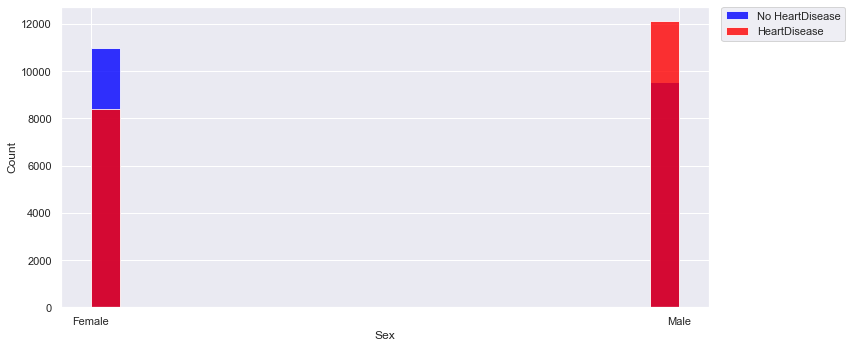

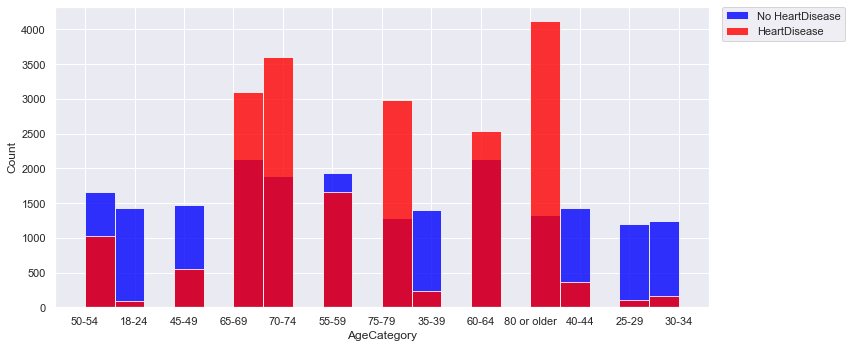

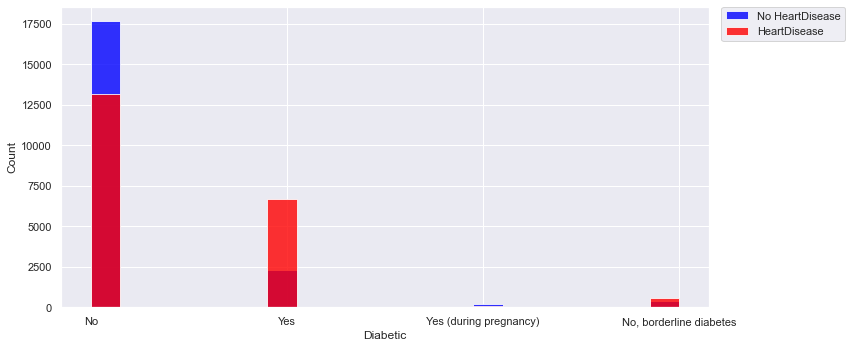

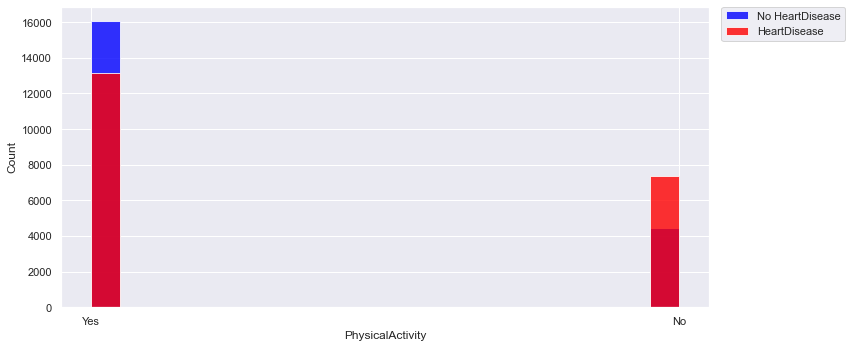

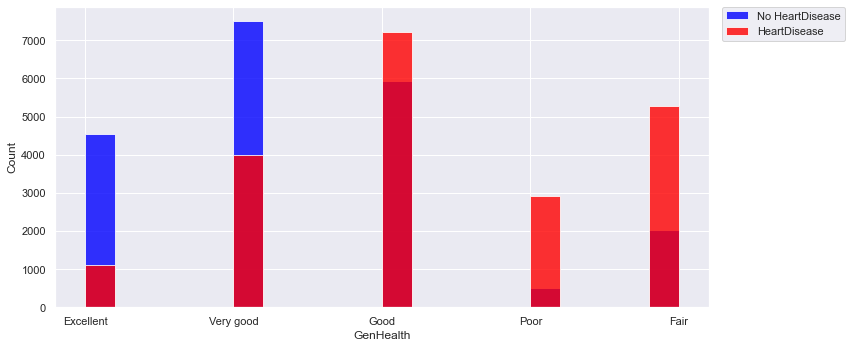

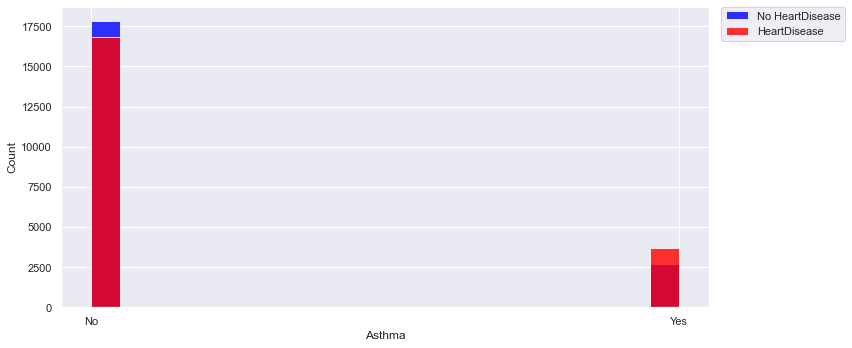

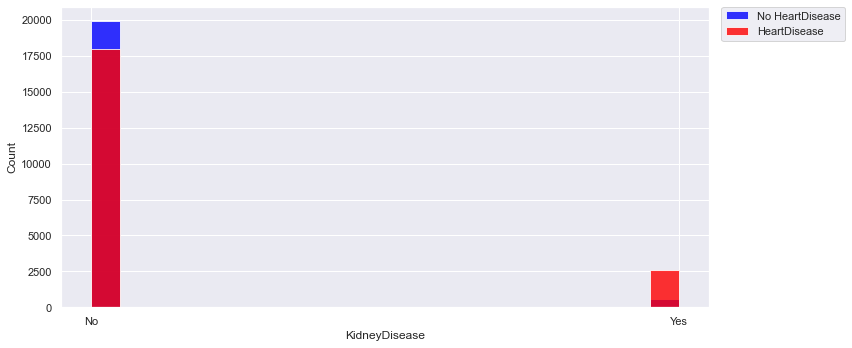

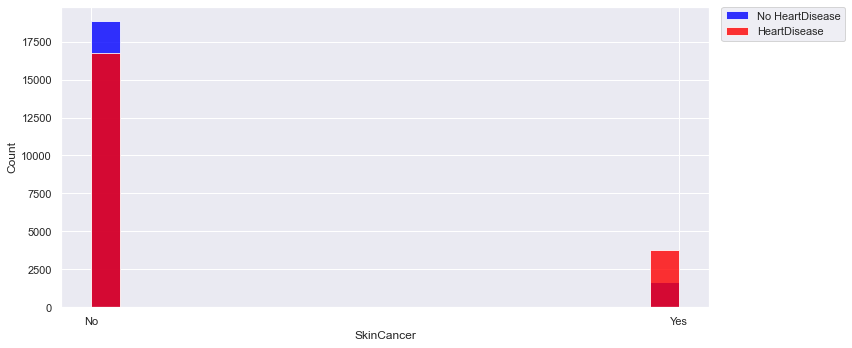

In [29]:
for col in obj_columns:
    plot_cat(col)

In [30]:
def plot_num(col: str):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    true_flag = TRAIN_TEST['HeartDisease'] == "Yes"
    sns.kdeplot(TRAIN_TEST[~true_flag][col], alpha=0.8,shade = True, color="green", label="No HeartDisease", ax = ax)
    sns.kdeplot(TRAIN_TEST[true_flag][col], alpha=0.6,shade = True, color="red", label="HeartDisease", ax = ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.show()

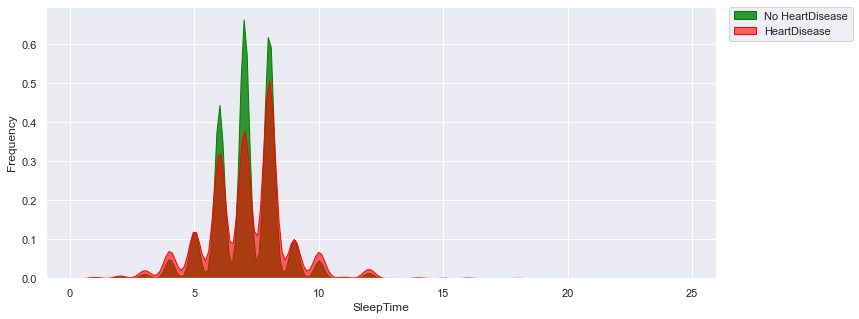

In [31]:
plot_num('SleepTime')

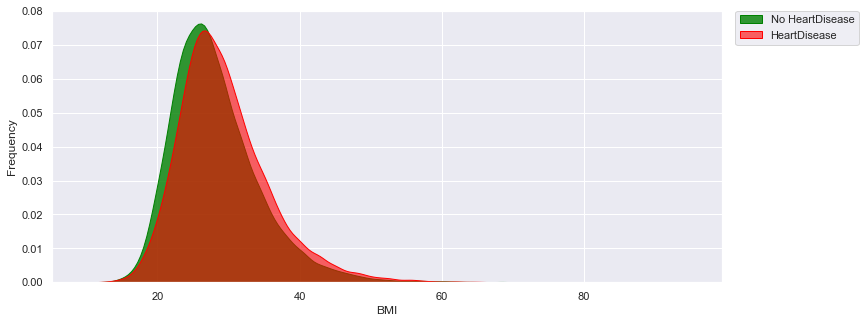

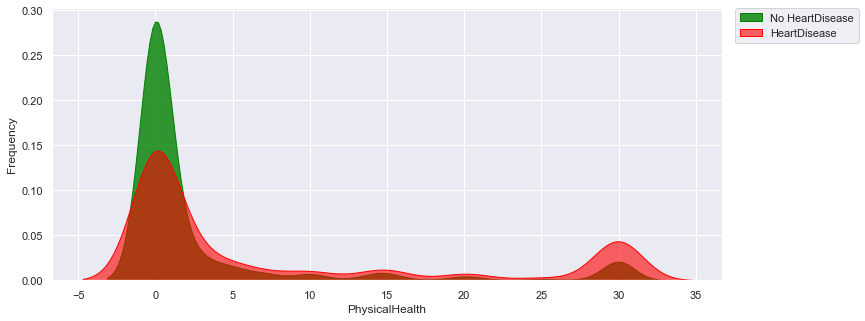

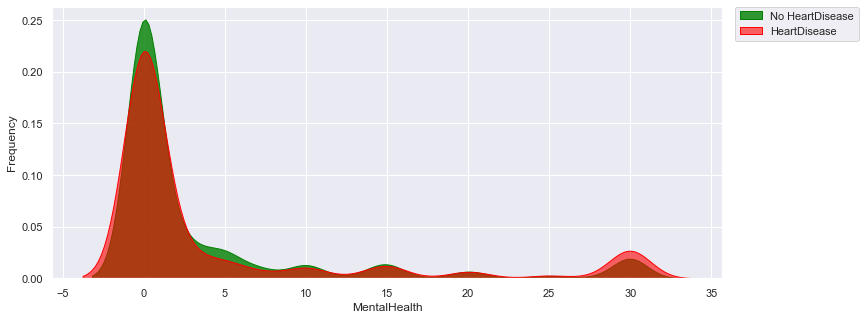

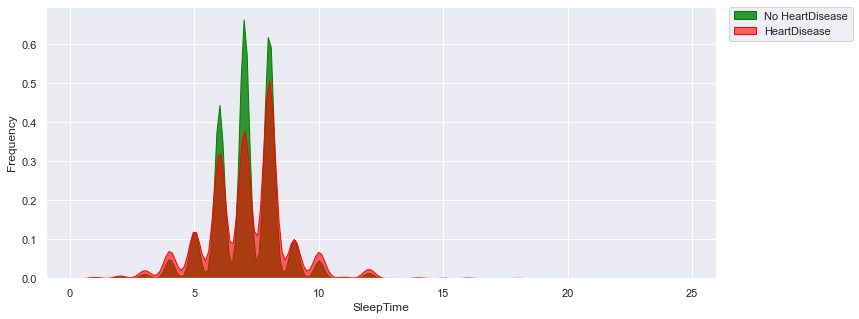

In [32]:
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

for col in num_cols:
    plot_num(col)

In [35]:
def replace_values(df, target_also = False):
    if target_also:
        df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
    df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)
    df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)
    df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)
    df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)
    df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,
                            'Yes (during pregnancy)':1,'Yes':1}, 
                            inplace=True)
    df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)
    df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)
    df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)
    df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)
    df['Sex'].replace({'Male':0,'Female':1}, inplace=True)
    df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,
                               '40-44':4,'45-49':5,'50-54':6,'55-59':7,
                               '60-64':8,'65-69':9,'70-74':10,
                               '75-79':11,'80 or older':12}, 
                               inplace=True)
    df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

    return df

In [36]:
TRAIN_TEST = replace_values(TRAIN_TEST, target_also=True)
VALID = replace_values(VALID, target_also=True)

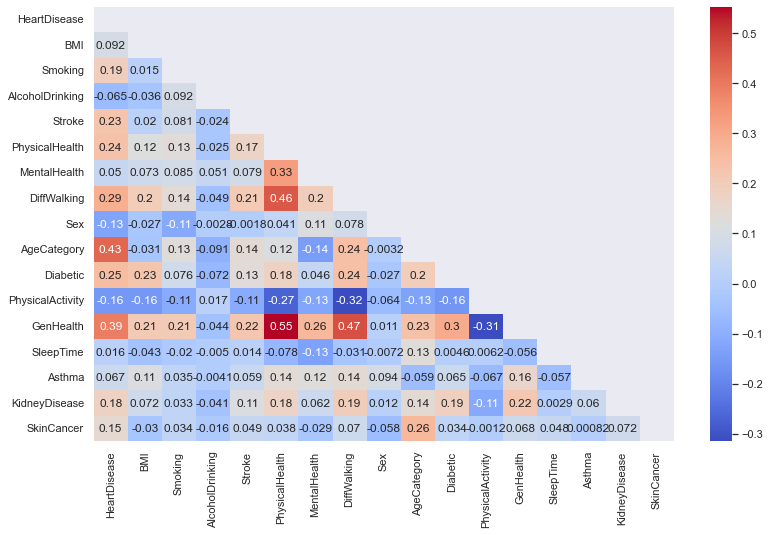

In [39]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(TRAIN_TEST.corr(), dtype=bool))
sns.heatmap(TRAIN_TEST.corr(), mask=mask, cmap='coolwarm', annot=True)
plt.show()